In [18]:
# imports

import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

# Set the Mapbox API
px.set_mapbox_access_token("pk.eyJ1IjoiYW1hY2s1NiIsImEiOiJja3RldzZmcnAwMmd5Mm5wZngyejR2cm5iIn0.JohlA6vRxmH-iugH7u_xXA")

# Import all the CSVs from the Data of the last 10 years

file_path_2010 = Path("../Data/RawData/2010.csv")
file_path_2011 = Path("../Data/RawData/2011.csv")
file_path_2012 = Path("../Data/RawData/2012.csv")
file_path_2013 = Path("../Data/RawData/2013.csv")
file_path_2014 = Path("../Data/RawData/2014.csv")
file_path_2015 = Path("../Data/RawData/2015.csv")
file_path_2016 = Path("../Data/RawData/2016.csv")
file_path_2017 = Path("../Data/RawData/2017.csv")
file_path_2018 = Path("../Data/RawData/2018.csv")
file_path_2019 = Path("../Data/RawData/2019.csv")
file_path_2020 = Path("../Data/RawData/2020.csv")
coor_path = Path("../Data/RawData/coordinates.csv")

# Convert the data to DataFrames and add a Year column

data_2010 = pd.read_csv(file_path_2010)
data_2010['Year'] = '2010'
data_2011 = pd.read_csv(file_path_2011)
data_2011['Year'] = '2011'
data_2012 = pd.read_csv(file_path_2012)
data_2012['Year'] = '2012'
data_2013 = pd.read_csv(file_path_2013)
data_2013['Year'] = '2013'
data_2014 = pd.read_csv(file_path_2014)
data_2014['Year'] = '2014'
data_2015 = pd.read_csv(file_path_2015)
data_2015['Year'] = '2015'
data_2016 = pd.read_csv(file_path_2016)
data_2016['Year'] = '2016'
data_2017 = pd.read_csv(file_path_2017)
data_2017['Year'] = '2017'
data_2018 = pd.read_csv(file_path_2018)
data_2018['Year'] = '2018'
data_2019 = pd.read_csv(file_path_2019)
data_2019['Year'] = '2019'
data_2020 = pd.read_csv(file_path_2020, header=1)
data_2020['Year'] = '2020'
coordinates = pd.read_csv(coor_path)

# Select specific columns desired to play with the data

data_2010 = data_2010[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2011 = data_2011[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2012 = data_2012[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2013 = data_2013[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2014 = data_2014[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2015 = data_2015[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2016 = data_2016[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2017 = data_2017[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2018 = data_2018[["Year","Player","Tm","Pos","FantasyPoints"]]
data_2019 = data_2019[["Year","Player","Tm","Pos","FantasyPoints"]]
coordinates.drop(labels=['zip', 'pic', 'Unnamed: 6', 'Conference'], axis=1, inplace=True)
coordinates = coordinates.set_index('Team')

#Manipulate 2020 to conform; note: 2020 data was not available from our primary source so we are using https://www.pro-football-reference.com/years/2020/fantasy.htm
data_2020 = data_2020[["Year","Player","Tm","FantPos","PPR"]]
data_2020 = data_2020.rename(columns={"FantPos": "Pos", "PPR" : "FantasyPoints"})
for ind in data_2020.index:
    data_2020['Player'][ind] = data_2020['Player'][ind].split(sep="\\")[0].replace("*", "").replace("+", "").strip()

# Set the index as the year

data_2010 = data_2010.set_index("Year")
data_2011 = data_2011.set_index("Year")
data_2012 = data_2012.set_index("Year")
data_2013 = data_2013.set_index("Year")
data_2014 = data_2014.set_index("Year")
data_2015 = data_2015.set_index("Year")
data_2016 = data_2016.set_index("Year")
data_2017 = data_2017.set_index("Year")
data_2018 = data_2018.set_index("Year")
data_2019 = data_2019.set_index("Year")
data_2020 = data_2020.set_index("Year")

# Merge all the data and clean it by eliminating players that don't have any points, or a single team

full_data = pd.concat([data_2010, data_2011, data_2012, data_2013, data_2014, data_2015, data_2016, data_2017, data_2018, data_2019, data_2020])
full_data = full_data[full_data['FantasyPoints'] != 0]
full_data = full_data[full_data['Tm'] != '2TM']
full_data = full_data[full_data['Tm'] != '3TM']
full_data = full_data[full_data['Tm'] != '4TM']
full_data = full_data[full_data['Pos'] != ""]
full_data = full_data.dropna()
full_data.to_csv('../Data/CleanData/full_data.csv', encoding='utf-8')

player_mean = full_data.groupby(['Player', 'Tm']).mean().sort_values(by='FantasyPoints', ascending=False, na_position='first')
player_mean.hvplot.bar(width=1200, rot=90, groupby="Tm")

:DynamicMap   [Tm]
   :Bars   [Player,Tm]   (FantasyPoints)

In [19]:
team_mean = full_data.groupby(['Tm']).mean().sort_values(by='FantasyPoints', ascending=False, na_position='first')
team_mean.hvplot.bar(width=800, rot=90).opts(color="Tm")

:Bars   [Tm]   (FantasyPoints)

In [20]:
position_mean = full_data.groupby(['Pos']).mean().sort_values(by='FantasyPoints', ascending=False, na_position='first')
position_mean.hvplot.bar(width=800, rot=90)

:Bars   [Pos]   (FantasyPoints)

In [21]:
best_team = full_data.groupby(['Player']).mean().sort_values(by='FantasyPoints', ascending=False, na_position='first').nlargest(15, 'FantasyPoints')
best_team.hvplot.bar(width=800, rot=90)

:Bars   [Player]   (FantasyPoints)

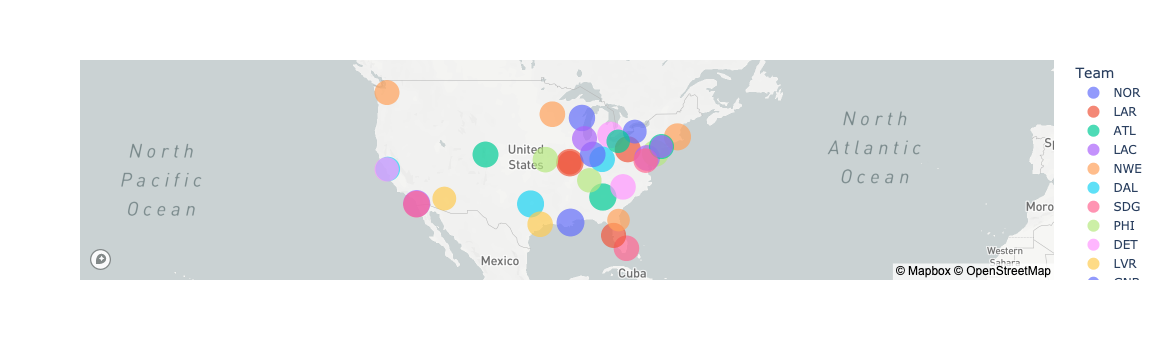

In [22]:
coords_and_mean = pd.concat([team_mean, coordinates], axis=1)
coords_and_mean = coords_and_mean.reset_index()
coords_and_mean = coords_and_mean.rename({'index': 'Team'}, axis=1)

coor_mapbox = px.scatter_mapbox(coords_and_mean, lat='latitude', lon='longitude', color="Team", size="FantasyPoints", zoom=2)
coor_mapbox.show()

[[1.         0.45440067]
 [0.45440067 1.        ]]


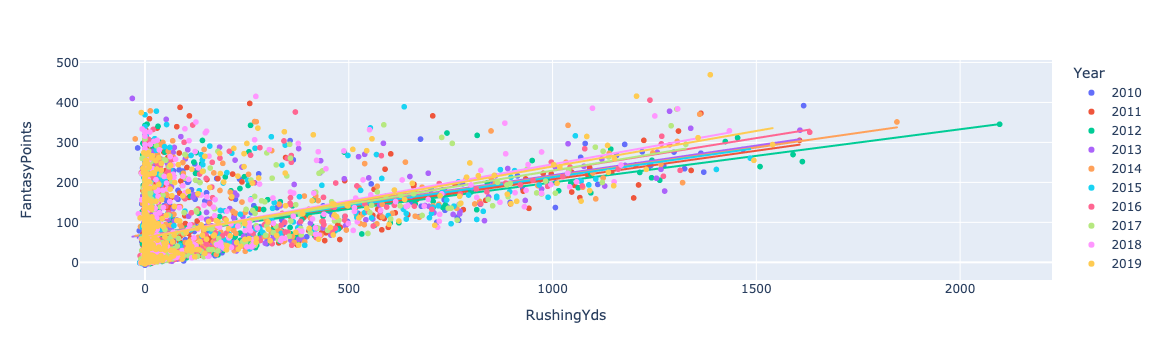

In [23]:
data_2010_yds = pd.read_csv(file_path_2010)
data_2010_yds['Year'] = '2010'
data_2011_yds = pd.read_csv(file_path_2011)
data_2011_yds['Year'] = '2011'
data_2012_yds = pd.read_csv(file_path_2012)
data_2012_yds['Year'] = '2012'
data_2013_yds = pd.read_csv(file_path_2013)
data_2013_yds['Year'] = '2013'
data_2014_yds = pd.read_csv(file_path_2014)
data_2014_yds['Year'] = '2014'
data_2015_yds = pd.read_csv(file_path_2015)
data_2015_yds['Year'] = '2015'
data_2016_yds = pd.read_csv(file_path_2016)
data_2016_yds['Year'] = '2016'
data_2017_yds = pd.read_csv(file_path_2017)
data_2017_yds['Year'] = '2017'
data_2018_yds = pd.read_csv(file_path_2018)
data_2018_yds['Year'] = '2018'
data_2019_yds = pd.read_csv(file_path_2019)
data_2019_yds['Year'] = '2019'
data_2010_yds = data_2010_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2011_yds = data_2011_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2012_yds = data_2012_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2013_yds = data_2013_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2014_yds = data_2014_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2015_yds = data_2015_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2016_yds = data_2016_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2017_yds = data_2017_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2018_yds = data_2018_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
data_2019_yds = data_2019_yds[["Year","Player","Tm","Pos","RushingYds","FantasyPoints"]]
full_data_yds = pd.concat([data_2010_yds, data_2011_yds, data_2012_yds, data_2013_yds, data_2014_yds, 
                           data_2015_yds, data_2016_yds, data_2017_yds, data_2018_yds, data_2019_yds])
full_data_yds = full_data_yds[full_data_yds['FantasyPoints'] != 0]
full_data_yds = full_data_yds[full_data_yds['Tm'] != '2TM']
full_data_yds = full_data_yds[full_data_yds['Tm'] != '3TM']
full_data_yds = full_data_yds[full_data_yds['Tm'] != '4TM']

corr = np.corrcoef(full_data_yds["RushingYds"], full_data_yds["FantasyPoints"])
print(corr)

fig = px.scatter(full_data_yds, x="RushingYds", y="FantasyPoints", trendline="ols", color='Year')
fig.show()

In [24]:
full_data_yds.hvplot.scatter(x='RushingYds', y='FantasyPoints', c='Year', groupby="Year")

:DynamicMap   [Year]
   :Scatter   [RushingYds]   (FantasyPoints,Year)

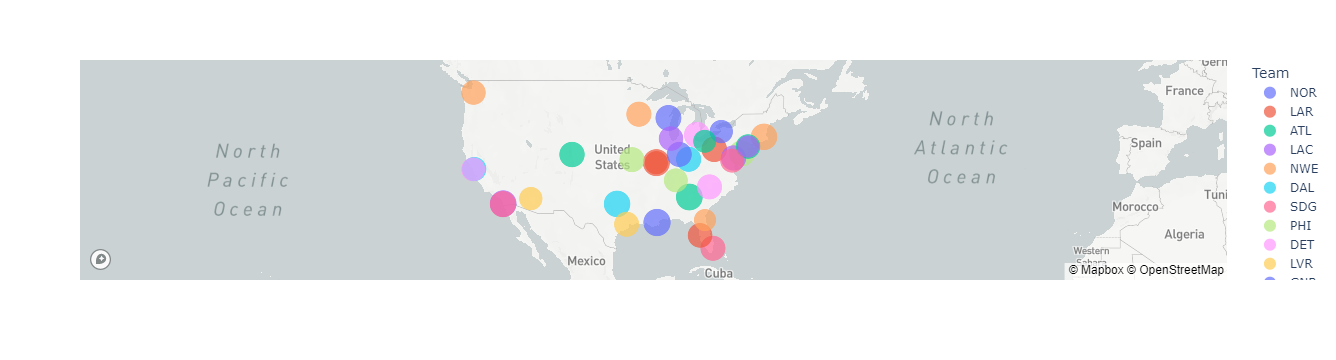

In [25]:
coords_and_mean = pd.concat([team_mean, coordinates], axis=1)
coords_and_mean = coords_and_mean.reset_index()
coords_and_mean = coords_and_mean.rename({'index': 'Team'}, axis=1)

coor_mapbox = px.scatter_mapbox(coords_and_mean, lat='latitude', lon='longitude', color="Team", size="FantasyPoints", zoom=2)
coor_mapbox.show()

In [26]:
data_2020['FantasyPoints'][610]

nan

In [27]:
test = data_2020.sort_values(by='FantasyPoints', ascending=False)

In [28]:
test

,Player,Tm,Pos,FantasyPoints
Year,,,,
2020,Josh Allen,BUF,QB,396.1
2020,Aaron Rodgers,GNB,QB,383.3
2020,Kyler Murray,ARI,QB,378.7
2020,Alvin Kamara,NOR,RB,377.8
2020,Patrick Mahomes,KAN,QB,374.4
...,...,...,...,...
2020,Derrick Willies,CLE,NaN,NaN
2020,Duke Williams,BUF,NaN,NaN
2020,Caleb Wilson,PHI,NaN,NaN


In [29]:
test2 = data_2019.sort_values(by='FantasyPoints', ascending=False)

In [30]:
test2

,Player,Tm,Pos,FantasyPoints
Year,,,,
2019,Christian McCaffrey,CAR,RB,469.20
2019,Lamar Jackson,BAL,QB,415.68
2019,Michael Thomas,NOR,WR,374.60
2019,Dak Prescott,DAL,QB,335.78
2019,Russell Wilson,SEA,QB,326.60
...,...,...,...,...
2019,Sean Mannion,MIN,QB,-1.46
2019,Jarrett Stidham,NWE,QB,-1.64
2019,Greg Dortch,CAR,0,-2.00


In [31]:
test2.head(30)

,Player,Tm,Pos,FantasyPoints
Year,,,,
2019,Christian McCaffrey,CAR,RB,469.20
2019,Lamar Jackson,BAL,QB,415.68
2019,Michael Thomas,NOR,WR,374.60
2019,Dak Prescott,DAL,QB,335.78
2019,Russell Wilson,SEA,QB,326.60
2019,Deshaun Watson,HOU,QB,318.98
2019,Aaron Jones,GNB,RB,314.80
2019,Ezekiel Elliott,DAL,RB,311.70
2019,Austin Ekeler,LAC,RB,309.00


In [ ]:
#Distribution graphs


